# Exercise 2 - Data Preparation

You should have completed exercise 1 before this exercise.

We use the same dataset "train_FD001.txt" as in exercise 1. You can download it from moodle. 
In this exercise we focus on the data preparation. Data preparation typically is the most time-consuming task in machine learning and data mining tasks. It is fundamental to prepare the raw data to be processable by algorithms. Next to outlier removal and filtering and smoothing of the data, feature generation (e.g. Fourier Transformation) or feature reduction (e.g. Principal Component Analysis, PCA) can be applied. 

In this exercise, we will analyse the influence of basic filtering (moving average) and feature reduction methods (PCA) on the correlations of variables with the RUL.

First we load basic libraries

In [3]:
import pandas as pd
import matplotlib.pyplot as plt

### 1. Load your data, rename columns if you wish to.

In [4]:
# load data
train_path = "train_FD001.txt"
df = pd.read_csv(train_path, sep=" ", header=None)

# dropping dolumns with no values
df = df.drop(columns=[26,27])

# rename the columns with the parameter names
data_header = {0: 'Engine', 1: 'Cycle', 2: 'Altitude', 3: 'MachNumber', 4: 'TRA', 5: 'T2', 6: 'T24', 7: 'T30', 8: 'T50', 9: 'P2', 10: 'P15', 11: 'P30', 12: 'Nf', 13: 'Nc', 14: 'epr', 15: 'Ps30', 16: 'phi', 17: 'NRf',
               18: 'NRc', 19: 'BPR', 20: 'farB', 21: 'htBleed', 22: 'Nf_dmd', 23: 'PCNfR_dmd', 24: 'W31', 25: 'W32'}
df = df.rename(columns=data_header)

### 2. Choose one of the variables with high RUL-correlation from exercise 1 and apply a moving average filter with window sizes of 5, 10 and 20 time steps.  Plot the results and compare it with the unfiltered signal.

In [5]:
# calculate maximum cycles per engine
df_max_cycles = df[['Engine', 'Cycle']].groupby(['Engine']).max()
df_max_cycles = df_max_cycles.rename(columns={'Cycle': 'Max_Cycles'})

# merge the max_cycles value to the dataframe
df = df.merge(df_max_cycles, left_on='Engine', right_index=True)

# calculation of remaining useful life
df['RUL'] = df['Max_Cycles'] - df['Cycle']

As seen in the last exercise, we have the highest positive correlations:
- Nc and NRc: 0.96
- Nf and NRf: 0.83
- T50 and Ps30: 0.83
- P30 and phi: 0.81

And the highest negative correlations:
- Ps30 and phi: -0.85
- P30 and Ps30: -0.82
- T50 and phi: -0.82

Text(0, 0.5, 'NRc')

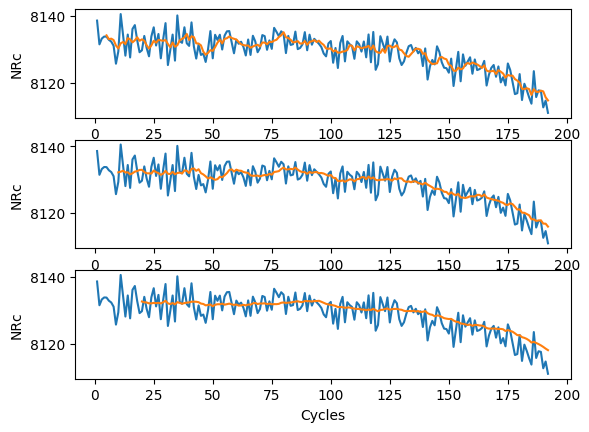

In [7]:
df['NRc_SMA05'] = df['NRc'].rolling(5).mean()
df['NRc_SMA10'] = df['NRc'].rolling(10).mean()
df['NRc_SMA20'] = df['NRc'].rolling(20).mean()

engine = 1
df_engine = df[df['Engine'] == engine]
plt.subplot(3,1,1)
plt.plot(df_engine['Cycle'], df_engine['NRc']) # non-filtered
plt.plot(df_engine['Cycle'], df_engine['NRc_SMA05']) # 5 steps moving average
plt.xlabel('Cycles')
plt.ylabel('NRc')

plt.subplot(3,1,2)
plt.plot(df_engine['Cycle'], df_engine['NRc']) # non-filtered
plt.plot(df_engine['Cycle'], df_engine['NRc_SMA10']) # 10 steps moving average
plt.xlabel('Cycles')
plt.ylabel('NRc')

plt.subplot(3,1,3)
plt.plot(df_engine['Cycle'], df_engine['NRc']) # non-filtered
plt.plot(df_engine['Cycle'], df_engine['NRc_SMA20']) # 20 steps moving average
plt.xlabel('Cycles')
plt.ylabel('NRc')

### 3. Compare correlations of the filtered sensor signal with the RUL and the raw signal with the RUL. What can you conclude from the results?

### 4. Fit and apply a PCA on the sensor subset. Remember to standardize the data first. Plot the first two Principal Components against each other.
Hint: Libraries like Scikit Learn include suitable functions.  

### 5. How much variance is explained by the first principal component?

### 6. How many principal components are needed to explain more than 95% of the variance in the data?

### 7. Analyse the correlation of the principal components with the RUL. Does the result meet your expectations?

### 8. Which sensors have the highest feature importance in first principal components? How does this relate to the correlations with RUL from exercise 1?